In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Example of loading data into a pandas DataFrame (replace with your actual data loading)
df = pd.read_csv('data/tmp/encoded_train.csv')
test_df = pd.read_csv('data/tmp/encoded_test.csv')

# Display the first few rows of the dataframe
df.head()


,Day,Month,Hour,Night,Holiday,Block,lat,long,Category,DayOfWeek-Wednesday,...,StreetType-TR,StreetType-I-80,StreetType-LN,StreetType-WK,StreetType-BL,StreetType-CT,Season-Winter,Season-Spring,Season-Summer,Season-Fall
0,29,11,0,1,0,0,0.584478,-1.557336,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,0,0,1
1,1,6,8,0,0,1,0.911468,0.775401,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,0,1,0
2,27,4,6,0,0,1,-2.045603,0.570183,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,1,0,0
3,1,4,15,0,0,32,1.510611,-0.150875,ASSAULT,0,...,0,0,0,0,0,0,0,1,0,0
4,25,7,16,0,0,0,0.718501,0.532851,ASSAULT,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# Define features (X) and target (y)
X = df.drop('Category', axis=1)  # Features: all columns except 'Category'
y = df['Category'] 

x_test = test_df.drop('Category', axis=1) # Features: all columns except 'Category'
y_test = test_df['Category']


In [4]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=150,        # Anzahl der Bäume
    max_depth=None,          # Unbegrenzte Tiefe
    random_state=42,         # Zufallszahlengenerator
    verbose=2,
    n_jobs=8
)

In [5]:
# Fitting the model
rf_classifier.fit(X, y)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    6.2s


building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76

[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:   29.8s finished


RandomForestClassifier(n_estimators=150, n_jobs=8, random_state=42, verbose=2)

In [6]:
# Get feature importance
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                  Feature    Importance
0                     Day  1.856481e-01
6                     lat  1.660668e-01
7                    long  1.638577e-01
2                    Hour  1.451306e-01
1                   Month  8.503698e-02
5                   Block  7.187834e-02
12       DayOfWeek-Friday  1.439146e-02
9      DayOfWeek-Thursday  1.420974e-02
11      DayOfWeek-Tuesday  1.382270e-02
8     DayOfWeek-Wednesday  1.372806e-02
14       DayOfWeek-Monday  1.342430e-02
10     DayOfWeek-Saturday  1.251338e-02
13       DayOfWeek-Sunday  1.156146e-02
47          Season-Summer  1.107251e-02
48            Season-Fall  1.102582e-02
46          Season-Spring  1.091823e-02
45          Season-Winter  1.078043e-02
3                   Night  9.927524e-03
4                 Holiday  5.573316e-03
22  PdDistrict-TENDERLOIN  3.938509e-03
36          StreetType-ST  3.170360e-03
30         StreetType-INT  2.930637e-03
25          StreetType-AV  2.447288e-03
21    PdDistrict-SOUTHERN  1.897085e-03


In [7]:
# Predict on the test data
y_pred = rf_classifier.predict(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    8.6s finished


In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.28468196571949206


In [9]:
y_pred_proba = rf_classifier.predict_proba(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    9.4s finished


In [10]:
label_binarizer = LabelBinarizer()
labelTransformed = label_binarizer.fit_transform(y_test)

df = pd.DataFrame(y_pred_proba, columns=rf_classifier.classes_)
df = df[label_binarizer.classes_]

loss = log_loss(labelTransformed, df)
print(f'Log Loss: {loss}')

Log Loss: 5.242658618640045


In [11]:
cnf_matrix = confusion_matrix(y_test, y_pred)


<Axes: xlabel='Predicted', ylabel='Actual'>

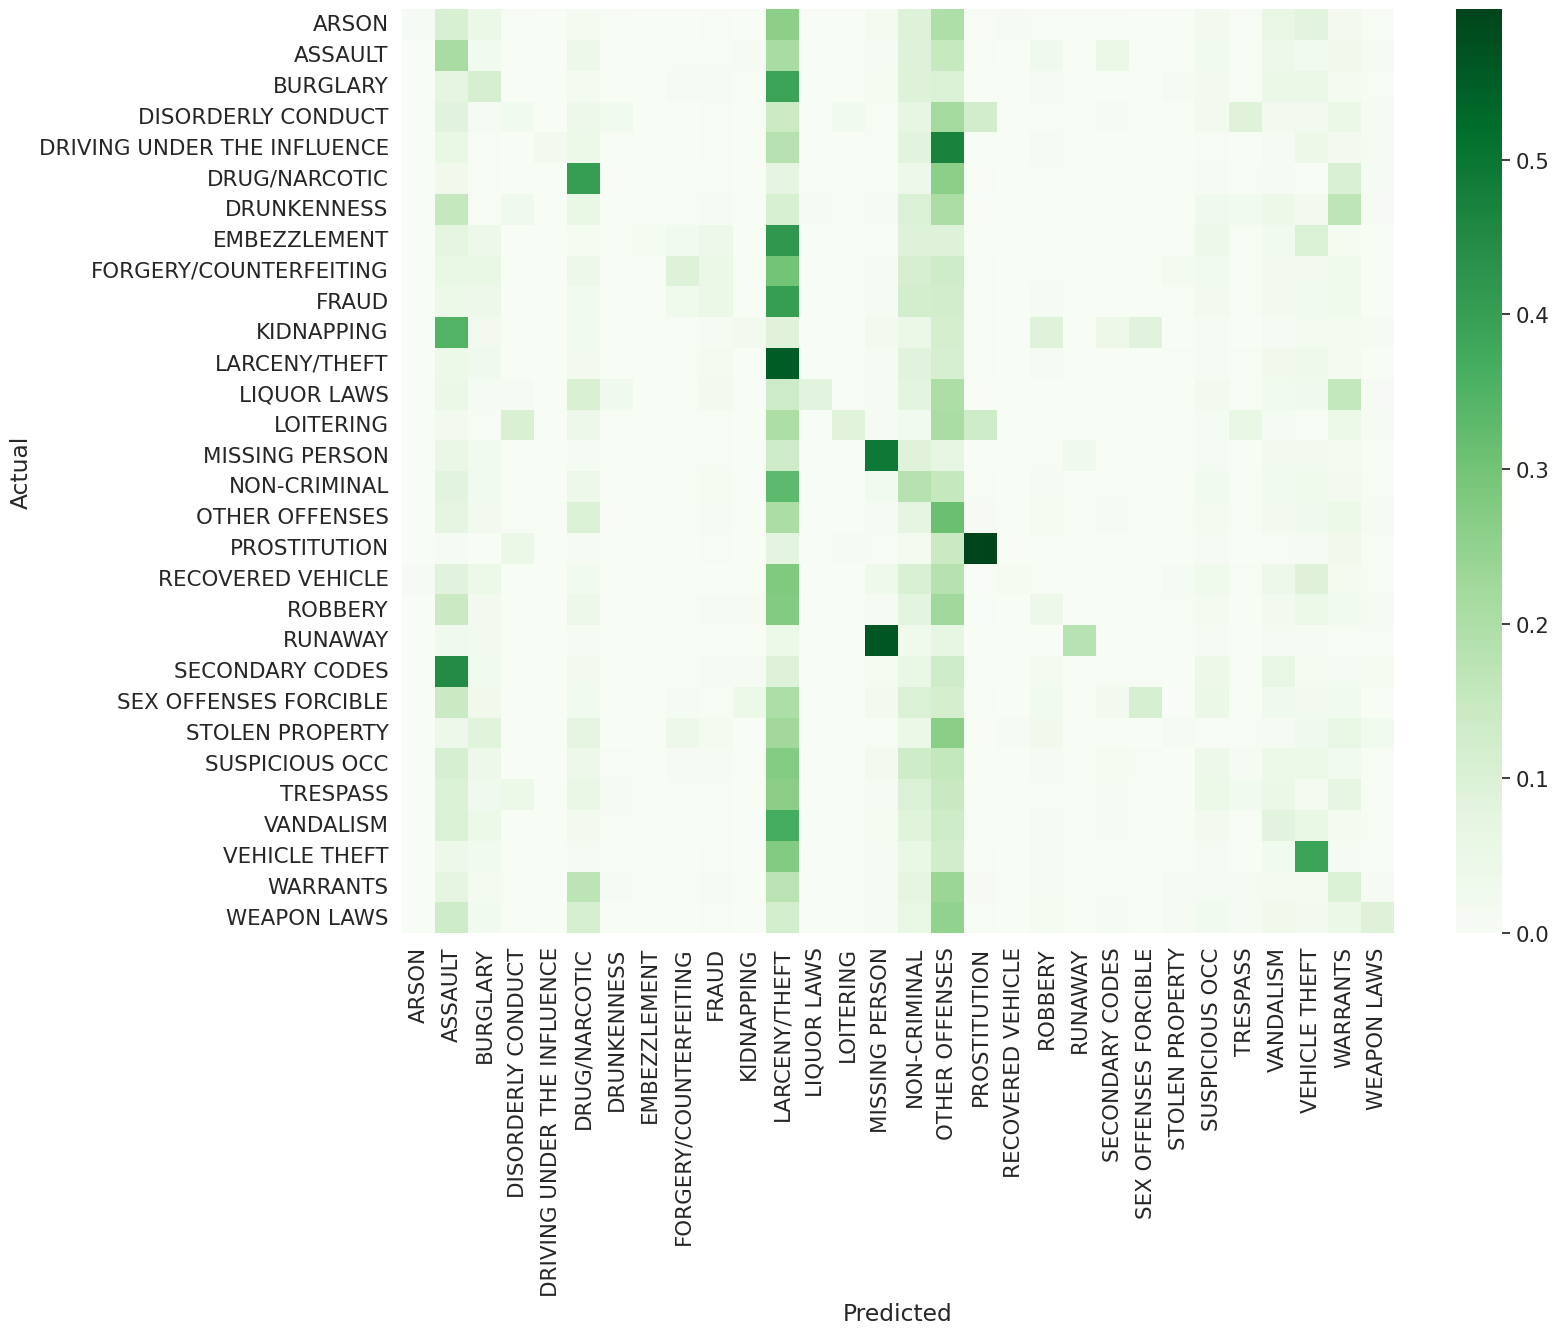

In [12]:
cnf_normalized = cnf_matrix / np.sum(cnf_matrix, axis=1).reshape(-1,1)


df_cm = pd.DataFrame(cnf_normalized, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (16,12))
plt.tight_layout()
sns.set(font_scale=1.4)  # for label size

# Plot the normalized confusion matrix
sns.heatmap(df_cm, cbar=True, cmap= "Greens", annot=False, fmt='.0f' #, annot_kws={"size": 13}
           )

In [13]:
# Save the model
joblib.dump(rf_classifier, 'models/random_forest/random_forest_model.pkl')

KeyboardInterrupt: 